 FCN=6.91866 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=1.32874e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.38406e-02   4.46245e-03   6.13154e-06  -1.15521e-07


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

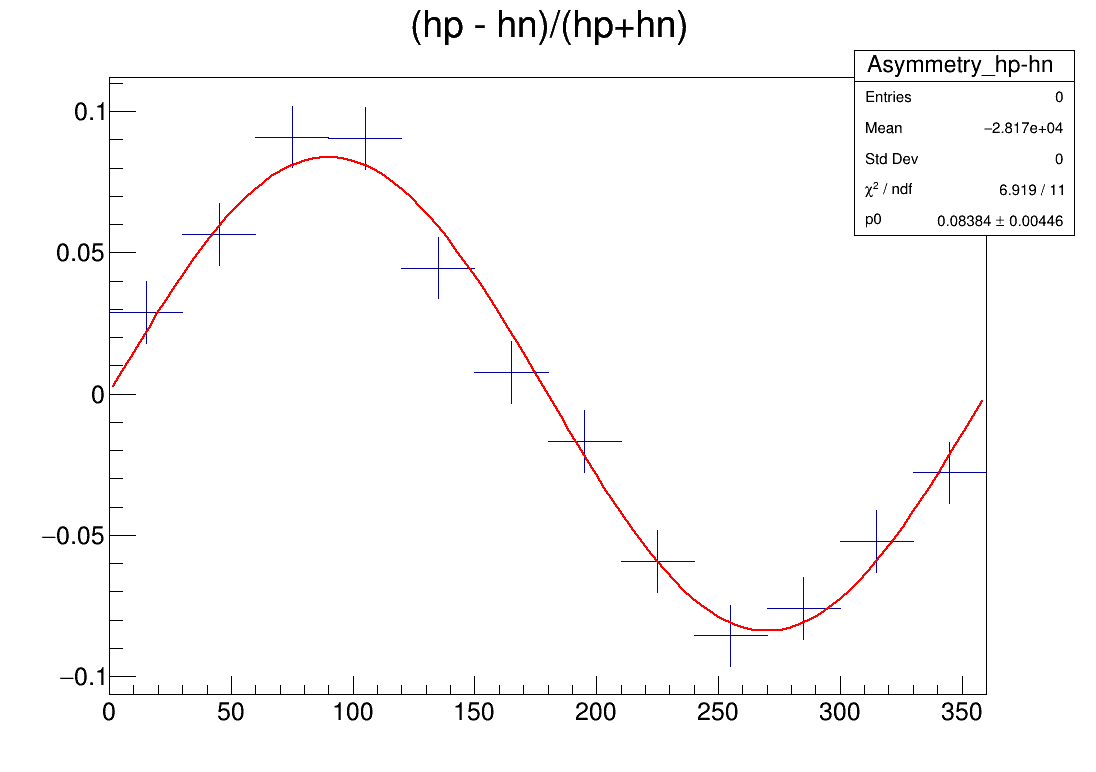

In [65]:
import ROOT

rdf = ROOT.RDataFrame(100000)
rdf = rdf.Define("phi", "gRandom->Uniform()*360;")
rdf = rdf.Define("ihel", "float sign = sin(TMath::DegToRad()*phi); return gRandom->Uniform()<(0.5-sign*0.04) ? -1 : 1;")

hp = rdf.Filter("ihel==1").Histo1D(("hp","",12,0,360),"phi")
hn = rdf.Filter("ihel==-1").Histo1D(("hn","",12,0,360),"phi")

c1 = ROOT.TCanvas('c1',"c1",1100,800)
c1.Draw()

hp = hp.GetValue()
hn = hn.GetValue()

hp.SetMinimum(0)
hp.Draw()
hn.SetLineColor(2)
hn.Draw("same")

ROOT.gStyle.SetOptFit(1)
ha = hp.GetAsymmetry(hn)
ha.Draw()
f1 = ROOT.TF1("f1","[0]*sin(x*TMath::DegToRad())",0,1)
ha.Fit(f1)
